# Random Sample Distributions

## Importing Packages

In [354]:
import sys
!{sys.executable} -m pip install astropy
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as scipy
import scipy.stats as stats
import statistics
from scipy import optimize
from astropy.io import fits
from astropy.table import Table
from scipy import interpolate
%matplotlib inline
from matplotlib.patches import Rectangle


np.set_printoptions(threshold=np.inf)
np.set_printoptions(precision = 40, suppress = True) #prevents scientific notation for 40 character numbers

In [345]:
### Read in data file

low_vtan_sample = fits.open('/Users/edm/Library/CloudStorage/Dropbox/Data/Everett_BD_Sample_for_flybys_sheet.fits')
low_vtan = Table(low_vtan_sample[1].data)

In [346]:
low_vtan

name,plx_formula,plxerr_formula,ref_plx_formula,pmra_formula,pmraerr_formula,pmdec_formula,pmdecerr_formula,ref_pm_formula,ra_j2000_formula,dec_j2000_formula,source_j2000_formula,SpT,PMTOT,Distance,Vtan
str28,float32,float32,str15,float32,float32,float32,float32,str7,float64,float32,str7,float32,float64,float64,float64
ULAS J131705.66+091016.9,3.8,0.7,DR2,-64.6,1.4,-379.7,0.8,DR2,199.2736,9.1717,DR2,-7.0,385.1561372,263.1578947,480.4316027
ULAS J033350.84+001406.1,8.6,0.7,DR2,772.1,0.9,-65.7,1.0,DR2,53.4614,0.2351,DR2,-10.0,774.8902503,116.2790698,427.0906728
ULAS J121508.37+040200.5,3.0,4.0,DR2,99.0,4.0,-246.0,2.4,DR2,183.7848,4.0336,DR2,-7.0,265.1735281,333.3333333,418.9741744
LHS 1265,7.2,0.19,DR2,-123.6,0.4,-587.6,0.19,DR2,23.7465,-9.0784,DR2,-9.5,600.458758,138.8888889,395.3020157
WISEA J020201.25-313645.2,15.1,0.3,DR2,-155.1,0.5,-1152.4,0.4,DR2,30.5058,-31.6091,DR2,-10.0,1162.79051,66.22516556,365.0084117
LEHPM 1-3365,8.18,0.29,DR2,625.0,0.4,38.38,0.3,DR2,52.6632,-23.8128,DR2,-7.0,626.1773107,122.2493888,362.8460211
WISEA J204027.30+695924.1,30.3,0.13,DR2,1558.38,0.28,1697.36,0.25,DR2,310.1004,69.985,DR2,-10.0,2304.252415,33.00330033,360.4672095
VVV J12564163-6202039,14.9,1.7,DR2,-1130.0,3.0,21.3,2.6,DR2,194.1814,-62.0345,DR2,-13.0,1130.20073,67.11409396,359.5403664
WISEA J001450.17-083823.4,20.14,0.28,DR2,1477.2,0.6,-257.96,0.28,DR2,3.7046,-8.639,DR2,-10.0,1499.554334,49.65243297,352.9239099


## Bimodal Radial Velocity Distribution

(array([ 16., 103., 316., 328., 127.,  23.,   2.,  71., 250., 370., 188.,
         30.,   3.]),
 array([-197.35280817526433 , -165.5188424045927  , -133.68487663392105 ,
        -101.85091086324941 ,  -70.01694509257777 ,  -38.182979321906146,
          -6.349013551234492,   25.48495221943716 ,   57.31891799010879 ,
          89.15288376078041 ,  120.98684953145204 ,  152.82081530212372 ,
         184.65478107279534 ,  216.48874684346697 ]),
 <BarContainer object of 13 artists>)

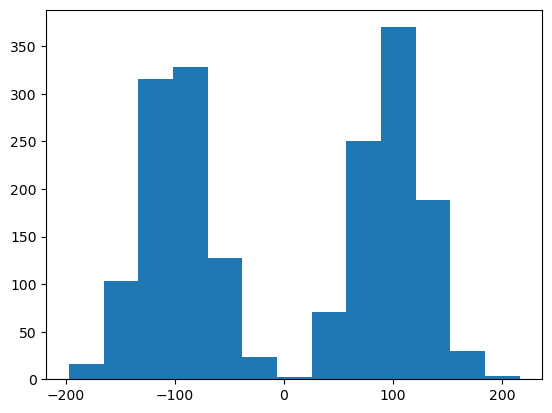

In [449]:
##the mean and standard deviation respectively, as well as the nummber of data points in the normal distribution
mu, sigma = -100, 30
mu2, sigma2 = 100, 30
X1 = np.random.normal(mu, sigma, 913)
X2 = np.random.normal(mu2, sigma2, 914)
X_test = np.concatenate([X1, X2])

plt.hist(X_test, bins = 'auto')

In [157]:
n_sample = 913
amin, amax = 0, 100
sample = np.zeros((0,))    # empty for now
while sample.shape[0] < n_samples: 
    s = np.random.normal(100, 50, size=(n_samples))
    Constraint = s[(s >= amin) & (s <= amax)]
    sample = np.concatenate([sample, Constraint])
sample = sample[:n_sample]

In [158]:
n_samples = 914
amin, amax = -100, 0
samples2 = np.zeros((0,))    # empty for now
while samples2.shape[0] < n_samples: 
    s = np.random.normal(-100, 50, size=(n_samples))
    Constraint2 = s[(s >= amin) & (s <= amax)]
    samples2 = np.concatenate([samples2, Constraint2])
samples2 = samples2[:n_samples]

(array([0.01807719972853739  , 0.013147054348027286 ,
        0.01643381793503399  , 0.016981611866201913 ,
        0.01807719972853739  , 0.018624993659705325 ,
        0.01643381793503399  , 0.013147054348027192 ,
        0.017529405797369717 , 0.018624993659705193 ,
        0.013147054348027192 , 0.015338230072698501 ,
        0.02081616938437639  , 0.012599260416859484 ,
        0.012599260416859394 , 0.015886024003866305 ,
        0.015338230072698392 , 0.012599260416859394 ,
        0.012599260416859439 , 0.01643381793503405  ,
        0.010408084692188232 , 0.012051466485691636 ,
        0.013147054348027239 , 0.00931249682985263  ,
        0.0071213211051813965, 0.008216908967517025 ,
        0.011503672554523834 , 0.008764702898684827 ,
        0.008216908967517025 , 0.0060257332428457966,
        0.007121321105181422 , 0.005477939311678017 ,
        0.0060257332428457966, 0.007121321105181447 ,
        0.0071213211051813965, 0.006573527174013643 ,
        0.010955878623355996

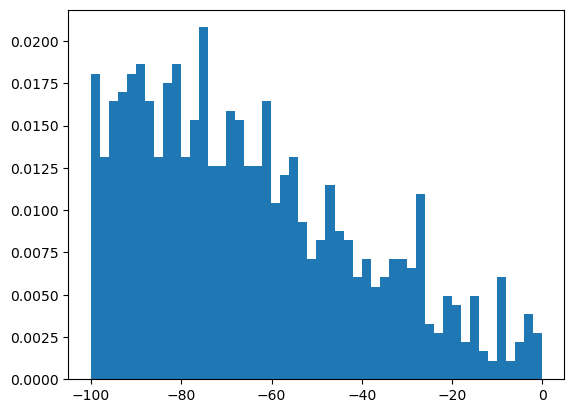

In [159]:
from scipy.stats import norm
plt.hist(samples2, bins=50, density=True)

(array([0.004419653879578462 , 0.0038671971446311544,
        0.0033147404096838455, 0.002762283674736539 ,
        0.004419653879578463 , 0.003314740409683844 ,
        0.006077024084420387 , 0.004419653879578463 ,
        0.006077024084420381 , 0.0022098269397892332,
        0.004972110614525766 , 0.003314740409683844 ,
        0.004972110614525775 , 0.004972110614525766 ,
        0.0066294808193677005, 0.005524567349473073 ,
        0.008286851024209625 , 0.004972110614525758 ,
        0.011049134698946169 , 0.006077024084420393 ,
        0.01215404816884074  , 0.011601591433893476 ,
        0.0044196538795784664, 0.011049134698946127 ,
        0.009391764494104242 , 0.011049134698946169 ,
        0.008839307759156933 , 0.007734394289262289 ,
        0.011049134698946169 , 0.014916331843577326 ,
        0.01381141837368266  , 0.01381141837368271  ,
        0.012154048168840786 , 0.00994422122905155  ,
        0.011601591433893476 , 0.014363875108629916 ,
        0.017678615518313866

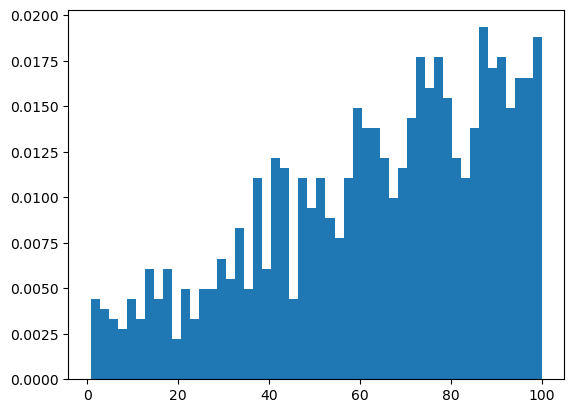

In [160]:
from scipy.stats import norm
plt.hist(sample, bins=50, density=True)

In [161]:
X = np.concatenate([sample, samples2])

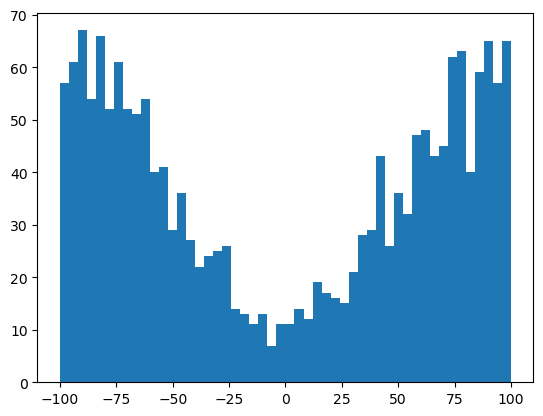

In [263]:
bimodal_dist = plt.hist(X, 50)

In [163]:
len(X)

1827

In [164]:
## pull out variables on interest

#source name
name = np.asarray(low_vtan['name'])

#radial velocity = X

# Kinematic values
Pmtot = np.asarray(low_vtan['PMTOT'])
Vtan = np.asarray(low_vtan['Vtan'])
plx = np.asarray(low_vtan['plx_formula'])
vtot = (np.sqrt(Vtan**2+X**2))

In [165]:
c1 = 0.9779*10**9
c2 = 4.74047

bim_dist_t = (-c1*(1/plx)*(X/vtot**2))/10**6
bim_dist_d = 10**3*(1/plx)*(Vtan/vtot)

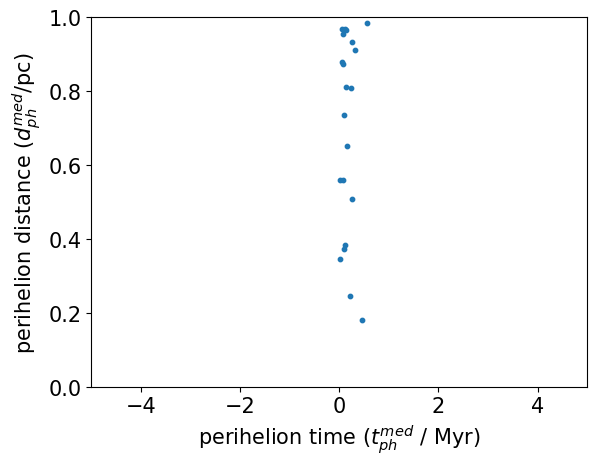

In [166]:
plt.scatter(bim_dist_t,bim_dist_d, 10)

xmin, xmax = plt.xlim(-5,5)
ymin, ymax = plt.ylim(0,1)

plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)", fontsize = 15)
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)", fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

In [167]:
minnum = np.argmin(bim_dist_d)
name[minnum]


'SDSS J104928.24+253723.2'

In [168]:
low_vtan[minnum]

name,plx_formula,plxerr_formula,ref_plx_formula,pmra_formula,pmraerr_formula,pmdec_formula,pmdecerr_formula,ref_pm_formula,ra_j2000_formula,dec_j2000_formula,source_j2000_formula,SpT,PMTOT,Distance,Vtan
str28,float32,float32,str15,float32,float32,float32,float32,str7,float64,float32,str7,float32,float64,float64,float64
SDSS J104928.24+253723.2,21.3,1.1,DR2,-1.3,2.1,-1.1,2.4,DR2,162.3677,25.6231,DR2,11.0,1.702938637,46.94835681,0.3789638093


## Normal Velocity Distribution

In [169]:
## generates a random distribution of 1827 values
Rvel = np.random.randn(1827)*100

In [170]:
Rvel

array([ -17.163945106538264   ,   76.63095191931228    ,
        279.12874070744       ,    9.811351644031276   ,
        -47.68972049758286    ,   -4.736608004718601   ,
        118.40630951651796    ,   84.05597169469569    ,
         -0.889482607873485   ,   28.098714695225585   ,
          0.6577404559386827  , -107.21233652215201    ,
        -78.29004652203149    , -132.90699976302267    ,
        -36.59303312025869    , -250.79347384250076    ,
         39.774635520274934   ,    5.487843862459544   ,
        114.71352015076175    , -112.02743563268488    ,
         37.630323062001736   ,  109.00191230664224    ,
        -77.52961471009588    ,  261.62490662385085    ,
        221.27282494226907    ,   61.9508586966776     ,
        -64.54530380513476    , -109.96364489910594    ,
         12.797211519799484   , -138.67330132192924    ,
        -75.49310838814523    ,   55.17742504110479    ,
         42.7229483676584     ,   24.22306633130817    ,
        -23.33437359273388    ,

Checking to see the distribution of values in the Rvel array

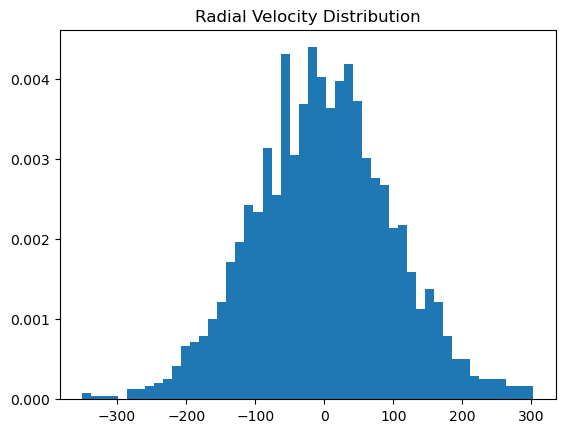

In [171]:
pdf, bins, patches = plt.hist(Rvel, bins=50, density=True)
plt.title('Radial Velocity Distribution')
plt.show()

## Perihelion time/distance Calculation

In [172]:
## pull out variables on interest

#source name
name = np.asarray(low_vtan['name'])

#radial velocity
rv = Rvel

# Kinematic values
Pmtot = np.asarray(low_vtan['PMTOT'])
Vtan = np.asarray(low_vtan['Vtan'])
plx = np.asarray(low_vtan['plx_formula'])
vtot = (np.sqrt(Vtan**2+rv**2))

In [173]:
c1 = 0.9779*10**9
c2 = 4.74047

norm_dist_t = (-c1*(1/plx)*(rv/vtot**2))/10**6
norm_dist_d = 10**3*(1/plx)*(Vtan/vtot)

In [174]:
len(rv)

1827

## Plot of Flybys using normal distribution

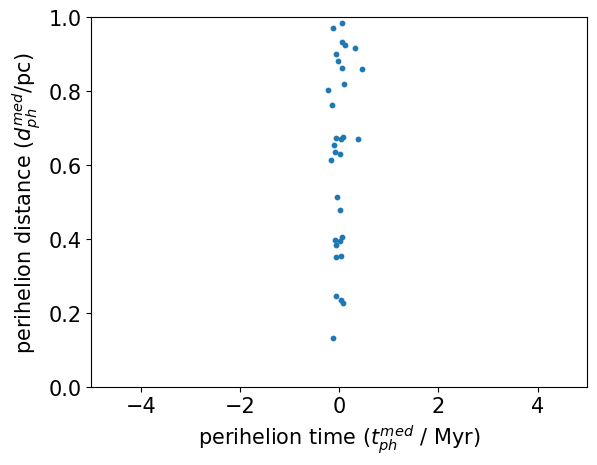

In [175]:
plt.scatter(norm_dist_t,norm_dist_d, 10)

xmin, xmax = plt.xlim(-5,5)
ymin, ymax = plt.ylim(0,1)

plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)", fontsize = 15)
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)", fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

In [176]:
minnum = np.argmin(d)

In [177]:
name[minnum]

'WISE J054601.19-095947.5'

In [178]:
low_vtan[minnum]

name,plx_formula,plxerr_formula,ref_plx_formula,pmra_formula,pmraerr_formula,pmdec_formula,pmdecerr_formula,ref_pm_formula,ra_j2000_formula,dec_j2000_formula,source_j2000_formula,SpT,PMTOT,Distance,Vtan
str28,float32,float32,str15,float32,float32,float32,float32,str7,float64,float32,str7,float32,float64,float64,float64
WISE J054601.19-095947.5,50.0,4.0,Best20a,-7.9,2.8,-8.7,2.1,Best20a,86.505,-9.9965,PS1,25.0,11.75159564,20.0,1.114051266


In [179]:
d[1826]

0.724632153797041

## SubPlot

Text(0.5, 0, 'Radial Velocity')

<Figure size 400x400 with 0 Axes>

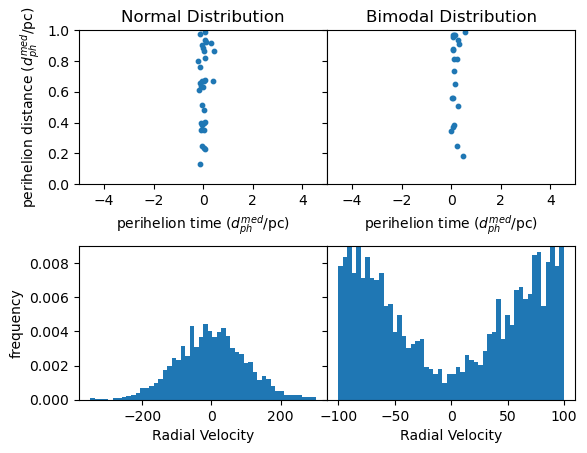

In [251]:
plt.figure(figsize=(4, 4))

fig, ((ax1, ax2), (ax3, ax4))  = plt.subplots(2, 2, sharey='row', gridspec_kw={'hspace': 0.4, 'wspace': 0})

ax1.scatter(norm_dist_t, norm_dist_d, 10)
ax1.set_title("Normal Distribution")
ax1.set_ylabel("perihelion distance ($d^{med}_{ph}$/pc)")
ax1.set_xlabel("perihelion time ($d^{med}_{ph}$/pc)")
ax1.set_xlim([-5, 5])
ax1.set_ylim([0, 1])

ax2.scatter(bim_dist_t, bim_dist_d, 10)
ax2.set_title("Bimodal Distribution")
ax2.set_xlabel("perihelion time ($d^{med}_{ph}$/pc)")
ax2.set_xlim([-5, 5])
ax2.set_ylim([0, 1])

ax3.hist(Rvel, bins=50, density=True)
ax3.set_ylabel("frequency")
ax3.set_xlabel("Radial Velocity")
ax3.set_ylim([0, 0.009])

ax4.hist(X, bins=50, density=True)
ax4.set_ylim([0, 0.009])
ax4.set_xlabel("Radial Velocity")

# <u>**Questions to Think About**</u>

## What does a comparison to the RV distribution look like using the data from GAIA and the UCD Sample?

### GAIA/UCD/LowVTan RV Normal Distribution 

In [227]:
GSample = fits.open('/Users/edm/Library/CloudStorage/Dropbox/Data/100pc_rvnotnull-Matched-Best.fits')
GSample_A3 = Table(GSample[1].data)

In [229]:
GSample_A3

SOURCE_ID_1,RA_1,RA_ERROR_1,DEC_1,DEC_ERROR_1,PARALLAX_1,PARALLAX_ERROR_1,PMRA_1,PMRA_ERROR_1,PMDEC_1,PMDEC_ERROR_1,PHOT_G_MEAN_MAG_1,PHOT_G_MEAN_FLUX_OVER_ERROR_1,PHOT_BP_MEAN_MAG_1,PHOT_BP_MEAN_FLUX_OVER_ERROR_1,PHOT_RP_MEAN_MAG_1,PHOT_RP_MEAN_FLUX_OVER_ERROR_1,PHOT_BP_RP_EXCESS_FACTOR_1,RUWE_1,IPD_FRAC_MULTI_PEAK_1,ADOPTEDRV,ADOPTEDRV_ERROR,ADOPTEDRV_REFNAME,RADIAL_VELOCITY_IS_VALID,GCNS_PROB,WD_PROB,DIST_1,DIST_16,DIST_50,DIST_84,XCOORD_50,XCOORD_16,XCOORD_84,YCOORD_50,YCOORD_16,YCOORD_84,ZCOORD_50,ZCOORD_16,ZCOORD_84,UVEL_50,UVEL_16,UVEL_84,VVEL_50,VVEL_16,VVEL_84,WVEL_50,WVEL_16,WVEL_84,NAME_GUNN,REFNAME_GUNN,GMAG_GUNN,E_GMAG_GUNN,RMAG_GUNN,E_RMAG_GUNN,IMAG_GUNN,E_IMAG_GUNN,ZMAG_GUNN,E_ZMAG_GUNN,NAME_2MASS,J_M_2MASS,J_MSIG_2MASS,H_M_2MASS,H_MSIG_2MASS,K_M_2MASS,K_MSIG_2MASS,NAME_WISE,W1MPRO_PM_WISE,W1SIGMPRO_PM_WISE,W2MPRO_PM_WISE,W2SIGMPRO_PM_WISE,W3MPRO_WISE,W3SIGMPRO_WISE,W4MPRO_WISE,W4SIGMPRO_WISE,source_id_2,designation,ra_2,dec_2,l,b,ecl_lon,ecl_lat,parallax_2,pmra_2,pmdec_2,phot_g_mean_mag_2,phot_bp_mean_mag_2,phot_rp_mean_mag_2,radial_velocity,radial_velocity_error,rv_template_teff,teff_gspphot,vbroad
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,str19,str1,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str26,str19,float64,float64,float64,float64,float64,float64,float64,float64,str17,float32,float32,float32,float32,float32,float32,str20,float32,float32,float32,float32,float32,float32,float32,float32,int64,str28,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32
5853498713190525696,217.39232147200883,0.023999203,-62.67607511676666,0.03443618,768.0665391873573,0.049872905,-3781.741008265163,0.031386077,769.4650146478623,0.050524533,8.984749,1527.8928,11.373116,420.41574,7.5685353,618.5337,1.6316793,0.97145325,11,-22.4,0.5,2006A&A...460..695T,F,1.0,0.21443602693602687,0.0012770583946187207,0.0012770583946187207,0.0013019451052972402,0.0013020443168793232,0.9026825912071892,0.8854277926826533,0.9027513779537488,-0.937190962916208,-0.9192765360715417,-0.9372623792898834,-0.0435694361577848,-0.04273660538199148,-0.04357275626143133,-29.5762032213989,-29.9273200783836,-29.2281213997157,1.97715744885935,1.61684347149232,2.34190888620955,13.7846931790232,13.7680476959747,13.8016945416289,142934.69-624034.9,2018PASA...35...10W,11.564000129699707,0.0020000000949949026,10.406999588012695,0.006000000052154064,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,5853498713190525696,Gaia DR3 5853498713190525696,217.39232147200883,-62.67607511676666,313.92549558326704,-1.9177544232946377,239.09130642182723,-44.76774317922497,768.0665391873573,-3781.741008265163,769.4650146478623,8.984749,11.373116,7.5685353,-21.942726,0.21612652,3500.0,2829.3542,nan
4472832130942575872,269.44850252543836,0.026238997,4.739420051112412,0.029043527,546.975939730948,0.040116355,-801.5509783684709,0.031820867,10362.394206546573,0.036070455,8.1939745,1553.9851,9.791788,951.9071,6.9580913,1518.3344,1.4803807,1.0848505,0,nan,nan,NaN,F,1.0,0.1975547138047138,0.0018279756246380554,0.0018281857970720895,0.0018380001506495126,0.0018475229351995032,1.5273049805078276,1.5191496432550171,1.5352180355020635,0.9194912489032898,0.9145814493992505,0.9242551859768606,0.44734762041826476,0.44495892218162303,0.4496653541826982,nan,nan,nan,nan,nan,nan,nan,nan,nan,1237668573088843078,2017ApJS..233...25A,10.22888,0.000203955,11.28868,0.001803346,11.12333,0.002675003,7.153592,0.0002993524,...,nan,nan,nan,nan,nan,nan,J175747.92+044324.5,13.521,0.015,14.485,0.03,nan,nan,nan,nan,4472832130942575872,Gaia DR3 4472832130942575872,269.44850252543836,4.739420051112412,31.049417957939717,14.0866036680238

In [231]:
Gaia_rv = np.asarray(GSample_A3["radial_velocity"])

(-100.0, 100.0)

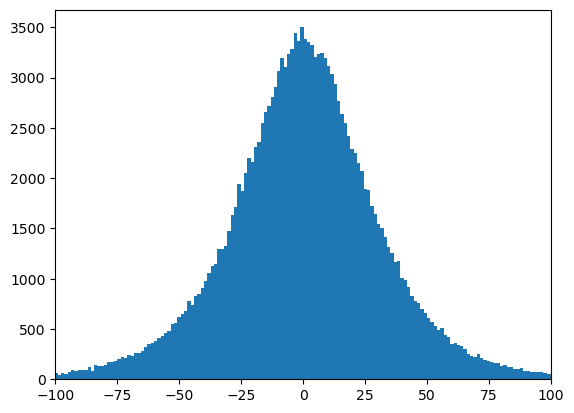

In [341]:
plt.hist(Gaia_rv, bins = 'auto')
plt.xlim(-100,100)

(array([  2.,   1.,   1.,   1.,   0.,   3.,   3.,   4.,   5.,   6.,  10.,
         16.,  17.,  19.,  24.,  29.,  41.,  47.,  58.,  56.,  75.,  61.,
        103.,  73.,  88., 105.,  96.,  87.,  95., 100.,  89.,  72.,  66.,
         64.,  51.,  52.,  38.,  27.,  33.,  29.,  19.,  12.,  12.,   7.,
          6.,   6.,   6.,   4.,   4.,   4.]),
 array([-350.5902716824364  , -337.5301909510854  , -324.4701102197343  ,
        -311.41002948838326 , -298.34994875703217 , -285.28986802568113 ,
        -272.22978729433004 , -259.169706562979   , -246.1096258316279  ,
        -233.04954510027687 , -219.9894643689258  , -206.92938363757474 ,
        -193.86930290622368 , -180.80922217487262 , -167.74914144352155 ,
        -154.6890607121705  , -141.62897998081942 , -128.56889924946836 ,
        -115.5088185181173  , -102.44873778676623 ,  -89.3886570554152  ,
         -76.3285763240641  ,  -63.268495592713066,  -50.20841486136197 ,
         -37.14833413001094 ,  -24.088253398659845,  -11.028172667

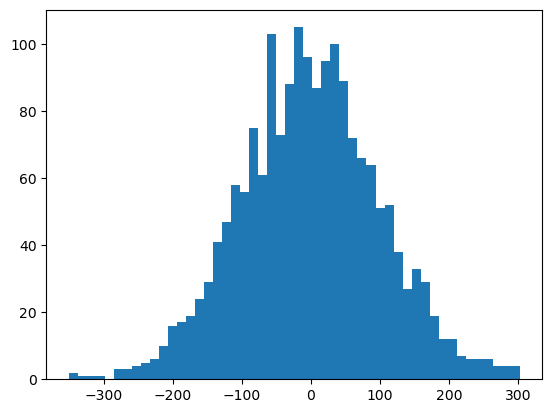

In [314]:
plt.hist(Rvel, 50)

(array([136., 336., 404., 296., 169., 149.,  91.,  68.,  43.,  29.,  20.,
         12.,   7.,   9.,   4.,   5.,   2.,   1.,   3.,   3.,   2.,   1.,
          1.,   4.,   3.,   0.,   1.,   2.,   1.,   2.,   1.,   0.,   2.,
          3.,   1.,   3.,   5.,   4.,   0.,   0.,   0.,   1.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([  0.3789638093     ,   9.980016587114   ,  19.581069364928   ,
         29.182122142742   ,  38.78317492055599 ,  48.38422769836999 ,
         57.985280476183995,  67.58633325399799 ,  77.187386031812   ,
         86.788438809626   ,  96.38949158743999 , 105.990544365254   ,
        115.591597143068   , 125.19264992088199 , 134.79370269869597 ,
        144.39475547650997 , 153.99580825432398 , 163.59686103213798 ,
        173.19791380995198 , 182.79896658776596 , 192.40001936557996 ,
        202.00107214339397 , 211.60212492120797 , 221.20317769902198 ,
        230.80423047683598 , 240.40528325464996 , 250.00633603246396 ,
        259.6073888

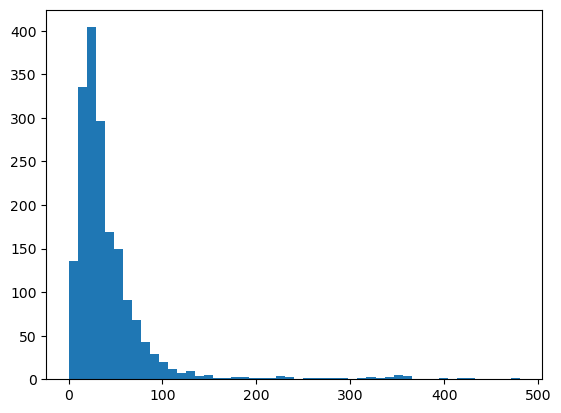

In [237]:
plt.hist(Vtan, 50)

In [252]:

#radial velocity
Gaia_rv = np.asarray(GSample_A3["radial_velocity"])

# PM RA and Dec
Gaia_PMD = np.asarray(GSample_A3['PMDEC_1'])
Gaia_PMR = np.asarray(GSample_A3['PMRA_1'])

#RA and DEc ICRS
Gaia_ra = np.asarray(GSample_A3['RA_1'])
Gaia_dec = np.asarray(GSample_A3['DEC_1'])

#parallax
Gaia_plx = np.asarray(GSample_A3['PARALLAX_1'])

#median distance

## read in temperature
Gaia_teff=np.asarray(GSample_A3['teff_gspphot'])
## temperature has no error

Gaia_source_id = np.asarray(GSample_A3["source_id_2"])

In [253]:
### calculate pmtot, vtan, vtot arrays: (takes a long time with MC sampling)
c1 = 0.9779*10**9
c2 = 4.74047

pmtot_array = np.sqrt(Gaia_PMD**2+Gaia_PMR**2)
vtan_array = (c2/Gaia_plx)*pmtot_array
vtot_array = (np.sqrt(vtan_array**2+Gaia_rv**2))

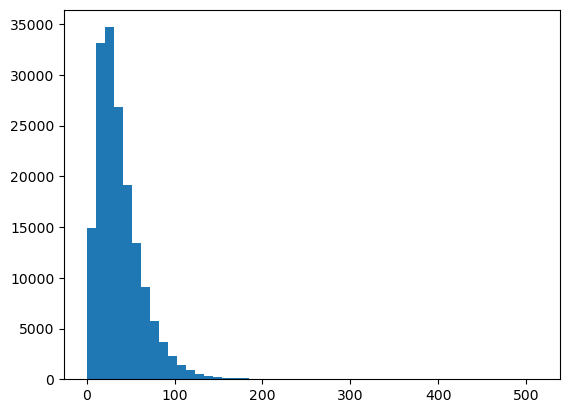

In [260]:
Gaia_vtan_hist = plt.hist(vtan_array, 50)

In [270]:
Gaia_t_per = -c1*(1/Gaia_plx*(Gaia_rv/vtot_array**2))/10**6
Gai_d_per = 10**3*(1/Gaia_plx)*(vtan_array/vtot_array)

(array([  0.001,   0.01 ,   0.1  ,   1.   ,  10.   , 100.   ]),
 [Text(0, 0.001, '$\\mathdefault{10^{-3}}$'),
  Text(0, 0.01, '$\\mathdefault{10^{-2}}$'),
  Text(0, 0.1, '$\\mathdefault{10^{-1}}$'),
  Text(0, 1.0, '$\\mathdefault{10^{0}}$'),
  Text(0, 10.0, '$\\mathdefault{10^{1}}$'),
  Text(0, 100.0, '$\\mathdefault{10^{2}}$')])

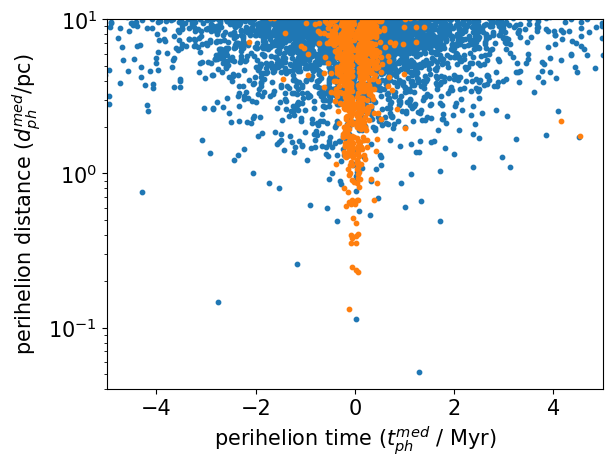

In [282]:
plt.scatter(Gaia_t_per, Gai_d_per, 10, )
plt.scatter(norm_dist_t,norm_dist_d, 10)

xmin, xmax = plt.xlim(-5,5)
ymin, ymax = plt.ylim(0.04,10)
plt.yscale('log')

plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)", fontsize = 15)
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)", fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

In [283]:
### Read in data file


GSampleBD = fits.open('/Users/edm/Desktop/Stellar Flybys/Gaia Data/Mass Bd sampls (dino).fits')
GSample_BD2 = Table(GSampleBD[1].data)

In [284]:
GSample_BD2

Name,f_Name,RAJ2000,DEJ2000,SpTl,Jmag,e_Jmag,J-Ks,e_J-Ks,pmRA,e_pmRA,pmDE,e_pmDE,Dist,e_Dist,RV-l,e_RV-l,r_SpTl,r_pmRA,r_Dist,r_RV-l,f_SpT,RV,e_RV,UVel,e_UVel,VVel,e_VVel,WVel,e_WVel,Prob,Pop,recno,SpT,Mass
str11,str1,str11,str12,str12,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,str1,float32,float32,float32,float32,float32,float32,float32,float32,str5,str4,int16,str12,float64
J1438+6408,,14 38 08.26,+64 08 36.30,L0,12.99,0.02,1.34,0.03,643.8,0.4,-206.3,0.3,17.04,0.04,-45.0,3.0,733,753,753,760,,-45.0,3.0,64.0,0.5,11.5,1.9,-39.0,2.0,0.22,D/TD,88,L0,0.07729007634
J1731+2721,c,17 31 29.74,+27 21 23.20,L0,12.09,0.03,1.18,0.03,-90.2,0.2,-252.9,0.2,11.94,0.02,-29.76,0.11,717,753,753,761,,-29.76,0.11,6.28,0.06,-17.78,0.08,-6.62,0.05,0.01,D,115,L0,0.07729007634
J0024-0158,,00 24 24.63,-01 58 19.90,L0.5,11.99,0.04,1.45,0.04,-77.2,0.5,141.1,0.3,12.51,0.03,11.6,1.6,733,753,753,739,,11.65,1.6,9.4,0.2,25.8,0.7,0.8,1.4,0.01,D,5,L0.5,0.07729007634
J0746+2000,,07 46 42.49,+20 00 32.60,L0.5,11.76,0.02,1.29,0.03,-370.0,4.0,-42.0,1.0,11.6,0.6,52.37,0.06,703,741,744,761,,52.37,0.06,-43.3,0.5,-1.8,0.5,7.7,1.1,0.01,D,50,L0.5,0.07729007634
J1221+0257,,12 21 27.71,+02 57 19.70,L0.5,13.07,0.01,1.16,0.01,-145.4,0.5,-43.5,0.3,18.54,0.09,-8.79,0.14,731,753,753,761,,-8.79,0.14,0.96,0.07,6.67,0.08,-3.75,0.13,0.01,D,76,L0.5,0.07729007634
J0045+1634,b,00 45 21.41,+16 34 44.70,L0{beta},13.06,0.02,1.69,0.03,358.9,0.4,-48.1,0.2,15.38,0.05,3.3,0.2,739,753,753,761,,3.29,0.17,-10.8,0.1,-1.89,0.12,1.82,0.12,0.01,D,9,L0{beta},0.07729007634
J0015+3516,,00 15 44.77,+35 16 02.60,L1,13.88,0.03,1.62,0.04,55.2,0.5,-257.1,0.3,17.06,0.11,-37.4,0.2,733,753,753,761,,-37.35,0.16,28.01,0.07,-27.23,0.14,5.31,0.14,0.01,D,3,L1,0.07251908397
J0751-2530,,07 51 16.30,-25 30 43.00,L1,13.16,0.02,1.17,0.03,-879.0,0.2,146.0,0.2,17.68,0.05,32.0,2.0,733,753,753,747,,32.0,2.0,-46.9,0.9,5.9,1.8,-49.26,0.16,0.44,D/TD,51,L1,0.07251908397
J0921-2104,,09 21 14.10,-21 04 44.40,L1,12.78,0.02,1.09,0.03,245.9,0.3,-911.6,0.3,12.61,0.04,80.53,0.11,731,753,753,761,,80.53,0.11,31.37,0.13,-83.91,0.12,11.14,0.08,2.99,D/TD,58,L1,0.07251908397


In [285]:
## pull out variables on interest from the brown dwarf file

#radial velocity
rvbd = np.asarray(GSample_BD2["RV"])

rv_ebd = np.asarray(GSample_BD2["e_RV"]) 


# PM RA and Dec
PMDbd = np.asarray(GSample_BD2['pmDE'])
PMRbd = np.asarray(GSample_BD2['pmRA'])
PMR_ebd = np.asarray(GSample_BD2['e_pmRA'])
PMD_ebd = np.asarray(GSample_BD2['e_pmDE'])

#RA and DEc ICRS
dbd = np.asarray(GSample_BD2['Dist'])
plxbd = (1/dbd)*1000
d_ebd = np.asarray(GSample_BD2['e_Dist'])
#parallax
plxbd = np.asarray(plxbd)

#median distanc

## read in temperature
#teff=np.asarray(GSample_A2['teff_gspphot'])
## temperature has no error

source_idbd = np.asarray(GSample_BD2["Name"])

#name colomn
#Namebd = np.asarray(GSample_BD2['Name'])

Massbd = np.asarray(GSample_BD2['Mass'])

In [286]:
sdbd = dbd+d_ebd
splxbd = (1/sdbd)*1000

In [288]:
### calculate pmtot, vtan, vtot arrays: (takes a long time with MC sampling)
c1 = 0.9779*10**9
c2 = 4.74047

pmtot_arraybd = np.sqrt(PMDbd**2+PMRbd**2)
vtan_arraybd = (c2/plxbd)*pmtot_arraybd
vtot_arraybd = (np.sqrt(vtan_arraybd**2+rvbd**2))


In [289]:
BD_t_per = -c1*(1/plxbd*(rvbd/vtot_arraybd**2))/10**6
BD_d_per = 10**3*(1/plxbd)*(vtan_arraybd/vtot_arraybd)

(array([  0.001,   0.01 ,   0.1  ,   1.   ,  10.   , 100.   ]),
 [Text(0, 0.001, '$\\mathdefault{10^{-3}}$'),
  Text(0, 0.01, '$\\mathdefault{10^{-2}}$'),
  Text(0, 0.1, '$\\mathdefault{10^{-1}}$'),
  Text(0, 1.0, '$\\mathdefault{10^{0}}$'),
  Text(0, 10.0, '$\\mathdefault{10^{1}}$'),
  Text(0, 100.0, '$\\mathdefault{10^{2}}$')])

<Figure size 200x200 with 0 Axes>

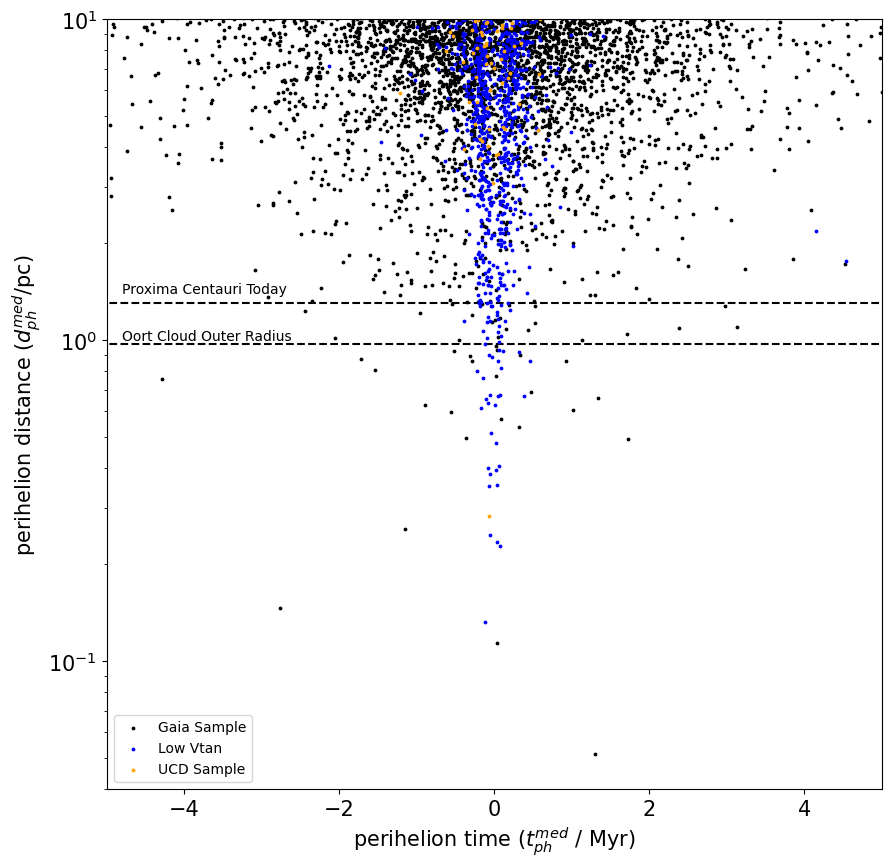

In [310]:
fig = plt.figure(figsize=(2,2))
plt.figure(figsize=(10, 10))

plt.plot(np.arange(-20,20,1), np.zeros(40)+1.3,color='black',linestyle='dashed',zorder=0)
plt.plot(np.arange(-20,20,1), np.zeros(40)+0.969627362,color='black',linestyle='dashed',zorder=0)

plt.scatter(Gaia_t_per, Gai_d_per, 3, facecolor = 'black', edgecolor = 'black', label='Gaia Sample')
plt.scatter(norm_dist_t,norm_dist_d, 3, facecolor = 'blue', edgecolor = 'blue', label='Low Vtan')
plt.scatter(BD_t_per,BD_d_per, 3, facecolor = 'orange', edgecolor = 'orange', label='UCD Sample')

plt.legend()

xmin, xmax = plt.xlim(-5,5)
ymin, ymax = plt.ylim(0.04,10)
plt.yscale('log')

plt.text(-4.8,1.4,'Proxima Centauri Today')
plt.text(-4.8,1,'Oort Cloud Outer Radius')

plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)", fontsize = 15)
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)", fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

### Flyby rate analysis

In [317]:
Gaia_t_flyby = Gaia_t_per[Gai_d_per<=1]
norm_dist_t_flyby = norm_dist_t[norm_dist_d<=1]

In [422]:
gaia_flyby_rate = [0, 0, 5, 9]
Meg_year_regime = [1,2,3,4]

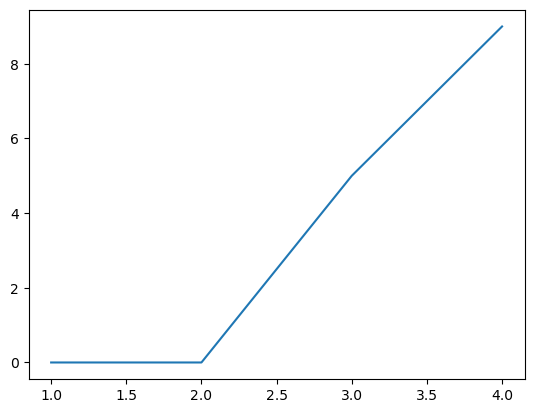

In [441]:
plt.plot(Meg_year_regime, gaia_flyby_rate)

In [424]:
x= [1,2,3,4]
empty_number_array = []
for i in x:
    flyby_number = -len(Gaia_t_flyby[Gaia_t_flyby <= (i - 1)]) + len(Gaia_t_flyby[Gaia_t_flyby<=i])
    empty_number_array.append(flyby_number)
number_of_flybys = np.hstack(empty_number_array)

In [425]:
x= [1,2,3,4]
empty_number_array2 = []
for i in x:
    flyby_number = -len(norm_dist_t_flyby[norm_dist_t_flyby <= (i - 1)]) + len(norm_dist_t_flyby[norm_dist_t_flyby<=i])
    empty_number_array2.append(flyby_number)
number_of_flybys2 = np.hstack(empty_number_array2)

In [426]:
empty_number_array2

[17, 0, 0, 0]

In [427]:
empty_number_array

[9, 5, 0, 0]

In [432]:
new

array([26,  5,  0,  0])

In [437]:
UCD = [27,  5,  0,  0]

In [438]:
new = np.add(empty_number_array2,empty_number_array)

Text(0, 0.5, 'Number of Flybys')

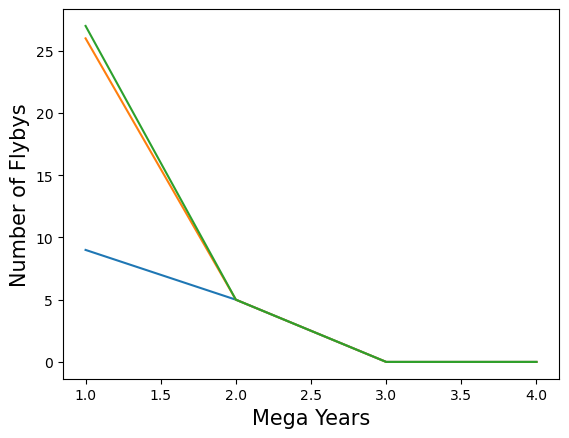

In [439]:
plt.plot(Meg_year_regime, empty_number_array)
plt.plot(Meg_year_regime, new)
plt.plot(Meg_year_regime, UCD)
plt.xlabel("Mega Years", fontsize = 15)
plt.ylabel("Number of Flybys", fontsize = 15)

In [447]:
slope, intercept = np.polyfit(Meg_year_regime, empty_number_array, 1)

In [448]:
slope

-3.200000000000001

In [446]:
slope

-8.3

In [ ]:
slope, intercept = np.polyfit(Meg_year_regime, UCD, 1)

In [444]:
print(slope)

-8.600000000000003


----------------------

We find that with all samples put together the rate of flybys is 8.6 flybys per mega year crudely calculated. Without brown dwarf samples we find 3.2 flybys per mega year. This is a stark 37.2 percent drop without brown dwarfs in concideration.

----------------------------------

### Can a Monte Carlo be Done to get a rough idea of the probability of any one of the objects approaching the 1 parsec limit?

In [419]:
len(Gaia_t_flyby[Gaia_t_flyby<0])



12

In [420]:
len(Gaia_t_flyby[Gaia_t_flyby<=1])

21

In [421]:
21-12

9